Histogram for per day Cumulative Visits

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


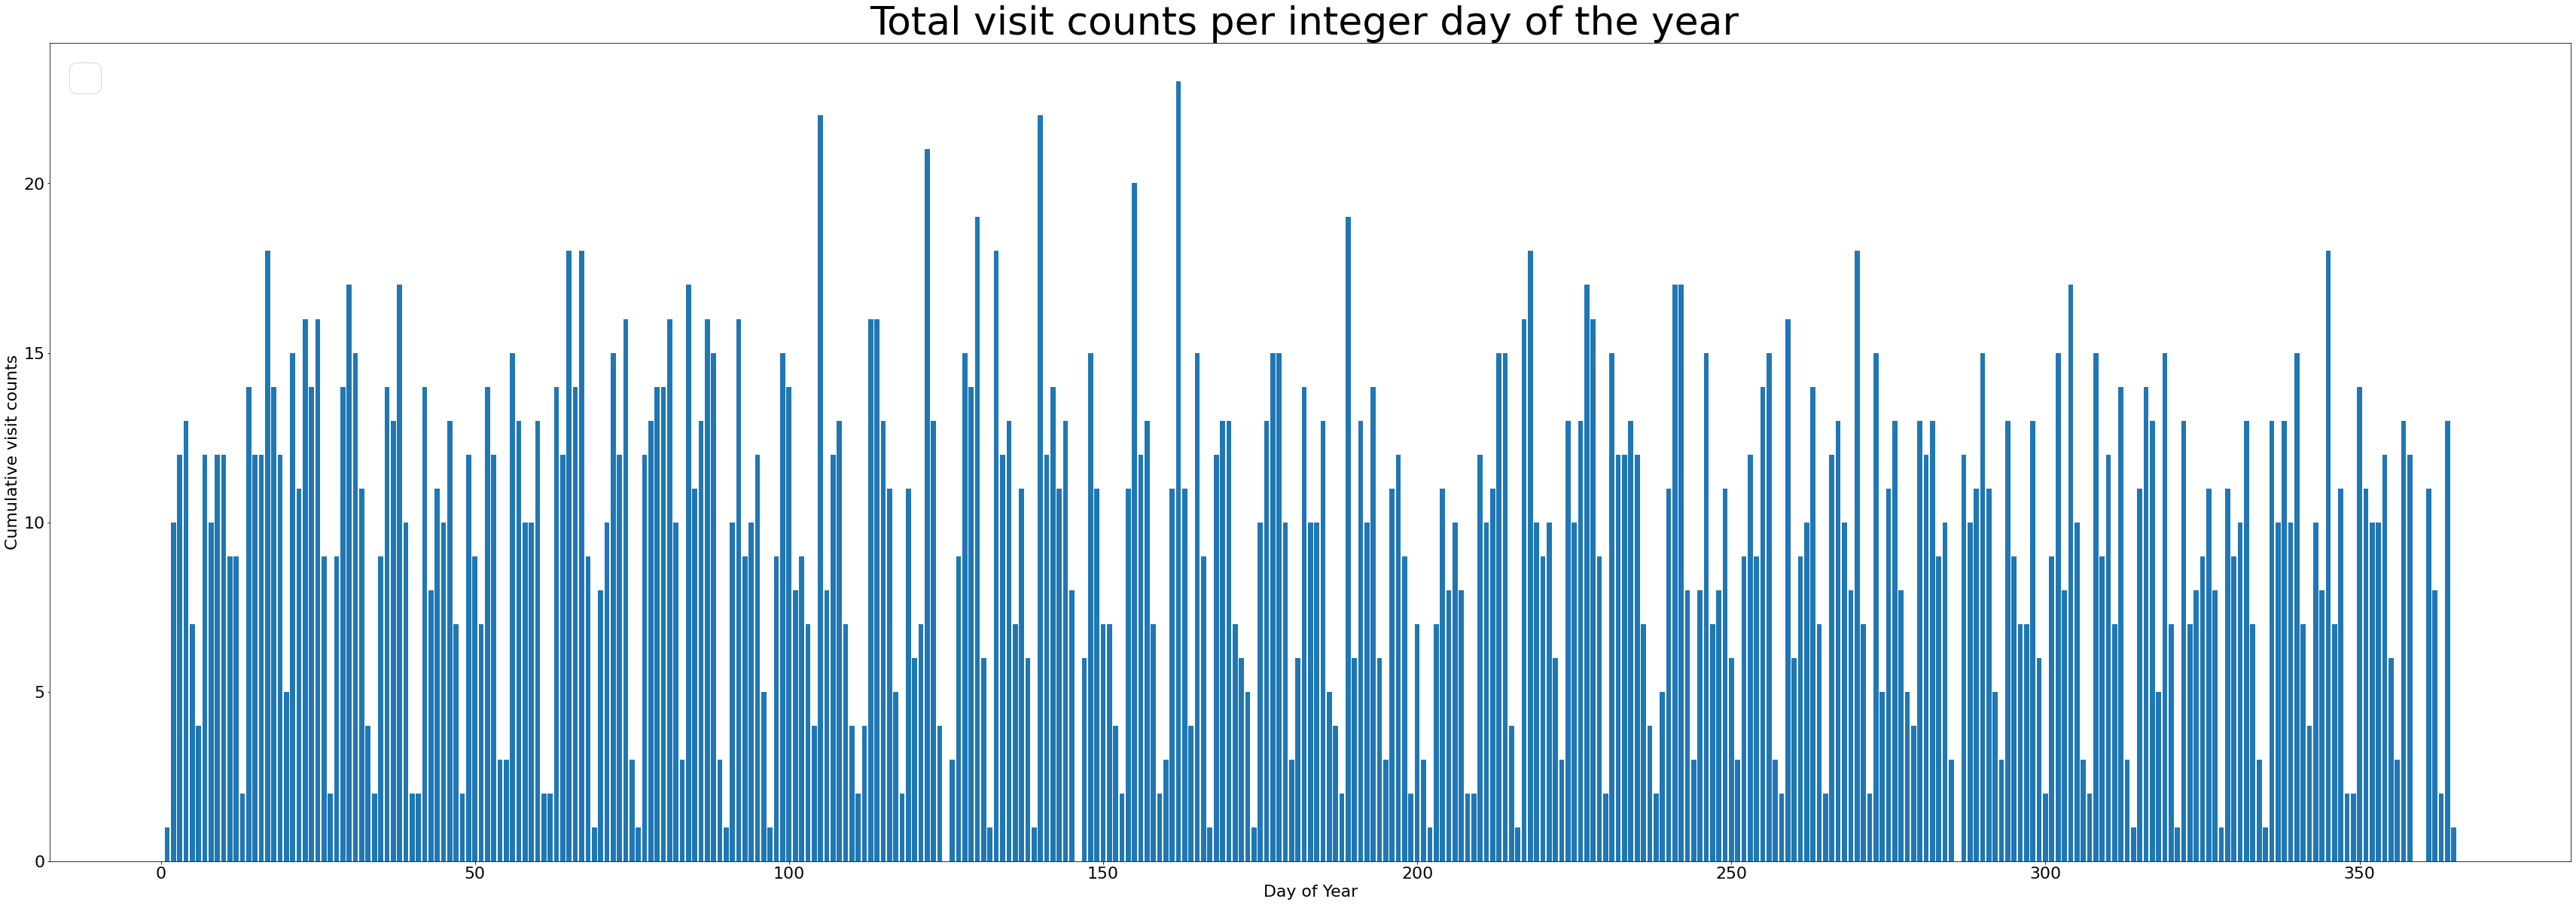

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean
import pickle
import seaborn as sns
import tensorflow as tf
%run constants.py
df = pd.read_csv(REARRANGED_DATA_FILEPATH)
doy_freq = []
for column in df:
    doy_freq .append(df[column].count())
doy_freq
del doy_freq[0]

from matplotlib import rcParams

rcParams['figure.figsize'] = 30,8

plt.style.context('fivethirtyeight')
plt.rcParams["figure.figsize"] = (60,20)
plt.bar(range(1, len(doy_freq) + 1), doy_freq)
plt.legend(loc="upper left", prop={'size': 52})
plt.rcParams.update({'font.size': 22})
plt.title("Total visit counts per integer day of the year ",fontsize = 52)
plt.xlabel("Day of Year")
plt.ylabel("Cumulative visit counts")
plt.show()

In [3]:
# load the testing, training and validation dataset

#Output window override (so you can predict on more ouput windows)
TIME_STEP: int = 60
output: int = 90

# Some file name editing for timestep
f = os.path.basename(X_TRAIN_SINGLE_TIMESTEP_RAW)
X_TRAIN_SINGLE_TIMESTEP_RAW = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_TEST_SINGLE_TIMESTEP_RAW)
X_TEST_SINGLE_TIMESTEP_RAW = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_VAL_SINGLE_TIMESTEP_RAW)
X_VAL_SINGLE_TIMESTEP_RAW = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 


f = os.path.basename(X_TRAIN_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP)
X_TRAIN_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_TEST_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP)
X_TEST_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_VAL_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP)
X_VAL_INPUT_SAVE_FILE_VEC_SINGLE_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 

f = os.path.basename(X_TRAIN_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP)
X_TRAIN_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_TEST_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP)
X_TEST_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(X_VAL_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP)
X_VAL_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 

f = os.path.basename(Y_TRAIN_INPUT_SAVE_FILE)
Y_TRAIN_INPUT_SAVE_FILE = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(output) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(Y_TEST_INPUT_SAVE_FILE)
Y_TEST_INPUT_SAVE_FILE = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(output) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(Y_VAL_INPUT_SAVE_FILE)
Y_VAL_INPUT_SAVE_FILE = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(output) + os.path.splitext(os.path.basename(f))[1]) 

f = os.path.basename(EMBEDDING_MATRIX_SAVE_FILE)
EMBEDDING_MATRIX_SAVE_FILE= os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(VOCAB_SAVE_FILE)
VOCAB_SAVE_FILE = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 
f = os.path.basename(TRAIN_CORPORA)
TRAIN_CORPORA = os.path.join(DATA_DIR, os.path.splitext(os.path.basename(f))[0] + "_" + str(TIME_STEP) + os.path.splitext(os.path.basename(f))[1]) 

file_suffix: str = f'_i{TIME_STEP}_o{output}'


In [4]:
with open(X_TRAIN_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP, "rb") as f:
        x_train = pickle.load(f)
with open(Y_TRAIN_INPUT_SAVE_FILE, "rb") as f:
        y_train = pickle.load(f)
with open(X_TEST_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP, "rb") as f:
        x_test = pickle.load(f)
with open(Y_TEST_INPUT_SAVE_FILE, "rb") as f:
        y_test = pickle.load(f)
with open(X_VAL_INPUT_SAVE_FILE_VEC_MULTI_TIMESTEP, "rb") as f:
        x_val = pickle.load(f)
with open(Y_VAL_INPUT_SAVE_FILE, "rb") as f:
        y_val = pickle.load(f)
with open(EMBEDDING_MATRIX_SAVE_FILE, "rb") as f:
        embedding_matrix = pickle.load(f)
with open(TRAIN_CORPORA, "rb") as f:
        train_corpora = pickle.load(f)
with open(VOCAB_SAVE_FILE, "rb") as f:
        vocab = pickle.load(f)

print("------Saving varaibles for reuse ------")
print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_test shape: {y_test.shape}")
print(f"X_val shape: {x_val.shape}")
print(f"Y_val shape: {y_val.shape}")
print(f"Embedding shape: {embedding_matrix.shape}")
print(f"Total 0 values: {(y_train == 0).sum()}")
print(f"Total 1 values: {(y_train == 1).sum()}")

import numpy
all_data = numpy.concatenate([x_train, x_test, x_val])
all_data_labels = numpy.concatenate([y_train, y_test, y_val])

------Saving varaibles for reuse ------
X_train shape: (2465, 60, 200)
Y_train shape: (2465,)
X_test shape: (685, 60, 200)
Y_test shape: (685,)
X_val shape: (274, 60, 200)
Y_val shape: (274,)
Embedding shape: (10000, 100)
Total 0 values: 1021
Total 1 values: 1444


In [5]:
average: list = []
for i in range(all_data.shape[0]):
    average.append(numpy.count_nonzero(all_data[i, TIME_STEP-1] > 1))
numpy.mean(average)

99.20181074766356

In [6]:
all_data_labels_revisit = all_data[all_data_labels.astype(bool)]
all_data_labels_norevisit = all_data[~all_data_labels.astype(bool)]
revisit_average: list = []
revisit_vocab: list = []
norevisit_vocab: list = []
norevisit_average: list = []
for i in range(all_data_labels_revisit .shape[0]):
    revisit_average.append(numpy.count_nonzero(all_data_labels_revisit [i, TIME_STEP-1] > 1))
    revisit_vocab.append(all_data_labels_revisit [i, TIME_STEP-1])
for i in range(all_data_labels_norevisit .shape[0]):
    norevisit_average.append(numpy.count_nonzero(all_data_labels_norevisit [i, TIME_STEP-1] > 1))
    norevisit_vocab.append(all_data_labels_norevisit [i, TIME_STEP-1])
print(f"Revisit average wordlengnth: {output}: {numpy.mean(revisit_average)}")
print(f"Novisit average wordlengnth: {output}: {numpy.mean(norevisit_average)}")

revisit_vocab_flat = [item for sublist in revisit_vocab for item in sublist]
norevisit_vocab_flat = [item for sublist in norevisit_vocab for item in sublist]

from collections import Counter
revisit_count = Counter(revisit_vocab_flat)
norevisit_count = Counter(norevisit_vocab_flat)

revisit_count_top_10  = revisit_count.most_common(22)[2:22]
norevisit_count_top_10  = norevisit_count.most_common(22)[2:22]

revisit_count_top_10 
norevisit_count_top_10 

total_counts = revisit_count & norevisit_count

Revisit average wordlengnth: 90: 104.43581938102486
Novisit average wordlengnth: 90: 92.10185822436338


Text(0.5, 1.0, 'Distribution of total word length for all data ')

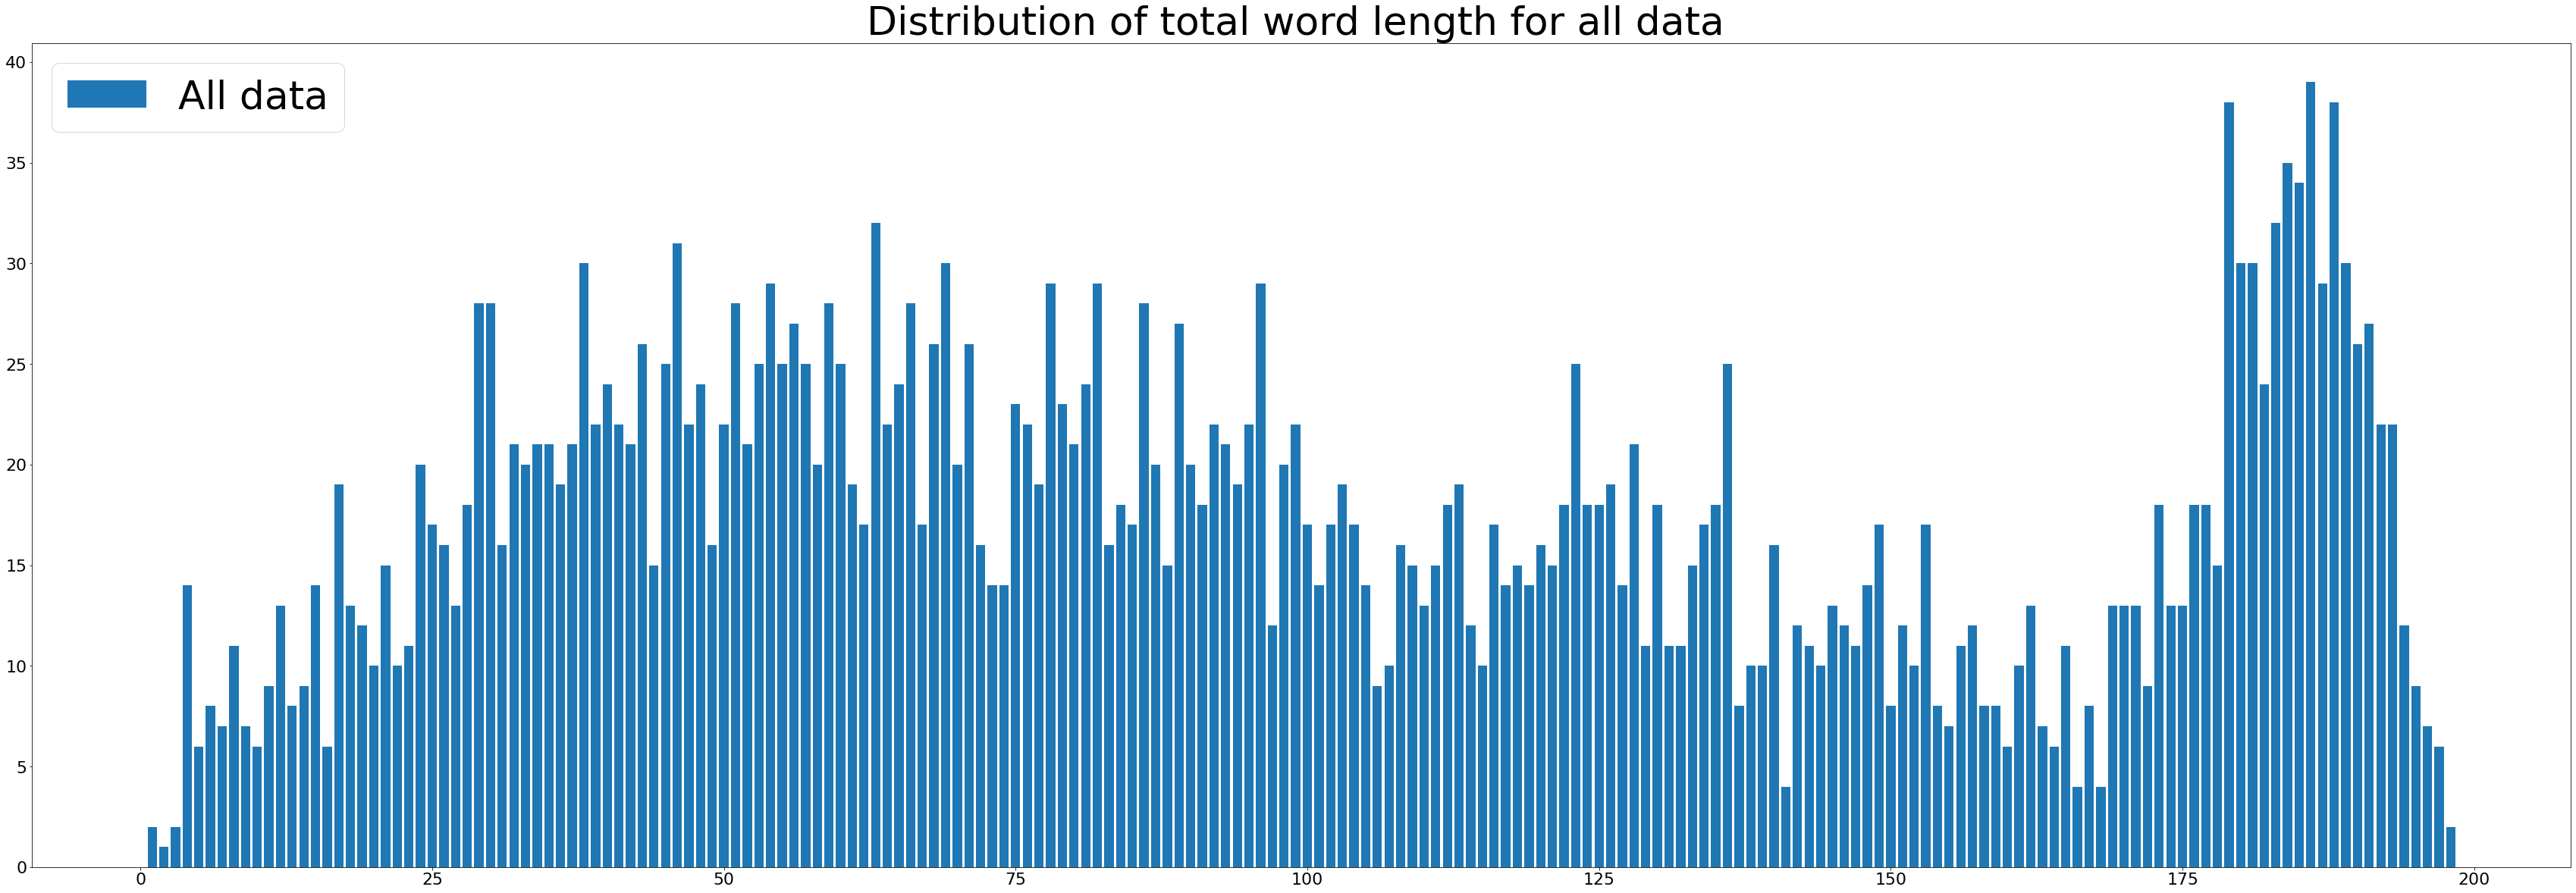

In [9]:
revisit_count_values = Counter(revisit_average)
novisit_count_values = Counter(norevisit_average)
average_count_values = Counter(average)

plt.rcParams.update({'font.size': 22})

# plt.bar(revisit_count_values.keys(), revisit_count_values.values(), label="Revisit")

# plt.bar(novisit_count_values.keys(), novisit_count_values.values(), alpha=0.5, label="Non-revisit")

plt.bar(average_count_values.keys(), average_count_values.values(), label="All data")


plt.legend(loc="upper left", prop={'size': 52})
plt.title("Distribution of total word length for all data ",fontsize = 52)
# for word in revisit_count_top_10:
#     print(vocab[word[0]], word[1])
# print('----')
# for word in norevisit_count_top_10:
#     print(vocab[word[0]], word[1])

In [ ]:

r = {}

for k, v in revisit_count.items():
    r[k] = abs((norevisit_count[k] - v) / v)
top_differences = sorted(r, key=r.get, reverse=True)[:24]

for word in top_differences:
    print(vocab[word])
print('----')

In [ ]:
dow_data = pd.read_csv('./data/DOW_data.csv')

In [ ]:
dow_data.DOW.value_counts()

In [ ]:
dow_data
dow_data['month'] = pd.DatetimeIndex(dow_data.Date).month
dow_data.month.value_counts()

In [ ]:

import numpy
import numpy as np
from keras.layers import TextVectorization
%run constants.py
tf.random.set_seed(
    SEED
)
np.random.seed(SEED)
with open(X_TRAIN_SINGLE_TIMESTEP_RAW, "rb") as f:
        x_train = pickle.load(f)
with open(Y_TRAIN_INPUT_SAVE_FILE, "rb") as f:
        y_train = pickle.load(f)
with open(X_TEST_SINGLE_TIMESTEP_RAW, "rb") as f:
        x_test = pickle.load(f)
with open(Y_TEST_INPUT_SAVE_FILE, "rb") as f:
        y_test = pickle.load(f)
with open(X_VAL_SINGLE_TIMESTEP_RAW, "rb") as f:
        x_val = pickle.load(f)
with open(Y_VAL_INPUT_SAVE_FILE, "rb") as f:
        y_val = pickle.load(f)
with open(EMBEDDING_MATRIX_SAVE_FILE, "rb") as f:
        embedding_matrix = pickle.load(f)
        
def create_textvectorisation(lst):
    text_vectorization: TextVectorization = TextVectorization(
        output_mode="int",
        split="whitespace",
        max_tokens=MAX_VOCAB_SIZE,
        output_sequence_length=MAX_SEQUENCE_LENGTH,
    )
    text_vectorization.adapt(lst)
    return text_vectorization


def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

#Shave off the training corpora for fine tuning glove embeddings with it
train_corpora = flatten(x_train)
# train_corpora = train_corpora.tolist()
# flat_list_train_corpora = [x for xs in train_corpora for x in xs]
flat_list_train_corpora = list(set(train_corpora))
flat_list_train_corpora

text_vectorization = create_textvectorisation(flat_list_train_corpora)

x_test_one_timestep_vec = text_vectorization(x_test)
x_train_one_timestep_vec = text_vectorization(x_train)
x_val_one_timestep_vec = text_vectorization(x_val)


print("------Saving varaibles for reuse ------")
print(f"X_train shape: {numpy.array(x_train_one_timestep_vec.shape)}")
print(f"Y_train shape: {numpy.array(y_train.shape)}")
print(f"X_test shape: {numpy.array(x_test_one_timestep_vec.shape)}")
print(f"Y_test shape: {numpy.array(y_test.shape)}")
print(f"X_val shape: {numpy.array(x_val_one_timestep_vec.shape)}")
print(f"Y_val shape: {numpy.array(y_val.shape)}")
print(f"Embedding shape: {embedding_matrix.shape}")
print(f"Total 0 values: {(y_train == 0).sum()}")
print(f"Total 1 values: {(y_train == 1).sum()}")

In [ ]:
numpy.array(x_train).shape

In [ ]:
def shanon_diversity_index(y_train):

    from numpy import log
    
    cls_1_count = (y_train == 0).sum()
    cls_2_count = (y_train == 1).sum()
    N = cls_1_count + cls_2_count
    prob_cls_1 = cls_1_count/N
    prob_cls_2 = cls_2_count/N
    log_pi_cls_1 = log(prob_cls_1) * prob_cls_1
    log_pi_cls_2 = log(prob_cls_2) * prob_cls_2

    value = log_pi_cls_1 + log_pi_cls_2 
    
    H = value*-1
    shanon = H / log(2) 
    return shanon

In [ ]:
print(f"Shanon Entropy measure of balance before balancing {shanon_diversity_index(y_train)}")

# Demonstrating better data balance following SMOTE
# from imblearn.over_sampling import SMOTE
# arr = x_train.reshape(len(x_train), -1)
# sm = SMOTE(random_state=SEED)
# x_train_bal, y_train_bal = sm.fit_resample(arr, y_train.ravel())
# print(f"Shanon Entropy measure of balance after SMOTE balancing {shanon_diversity_index(y_train_bal)}")

In [ ]:
# Get all classes where revisit

#Average word length per class
import numpy as np

df = pd.DataFrame (x_train, columns = ['ehr'])

def clean_df(df):
    no_uppercase = df.apply(lambda x: x.astype(str).str.lower()) 
    no_html = no_uppercase.replace(r'<[^<>]*>', '', regex=True)
    no_punctuation = no_html.replace(r'[^\w]', ' ', regex=True)
    no_digits = no_punctuation.replace(r'\w*\d\w*', ' ', regex=True)
    return no_digits

df = clean_df(df)



df['count'] = df['ehr'].str.split().str.len()

norevisits = df[(y_train == 0)]
revisits = df[(y_train == 1)]

train_postprocessed_average_word_length = df['count'].mean()
norevisits_train_postprocessed_average_word_length = norevisits['count'].mean()
revisits_train_postprocessed_average_word_length = revisits['count'].mean()

# print(f"Total Visits in train dataset {x_train.shape[0]}")
print(f"Average EHR length in postprocessed train dataset: {train_postprocessed_average_word_length}")
print(f"Average EHR length in postprocessed train norevisit class dataset: {norevisits_train_postprocessed_average_word_length }")
print(f"Average EHR length in postprocessed train revisit class dataset: {revisits_train_postprocessed_average_word_length}")




In [ ]:

x_train_words = [words for segments in df.ehr.to_list() for words in segments.split()]
from collections import Counter
x_train_count = Counter(x_train_words)
x_train_top_10 = list(x_train_count.most_common(20))


plt.bar(range(len(x_train_top_10 )), [val[1] for val in x_train_top_10 ], align='center')
plt.xticks(range(len(x_train_top_10 )), [val[0] for val in x_train_top_10 ])
plt.xticks(rotation=90)
plt.xticks(fontsize= 16)
plt.show()



In [ ]:

x_train_words = [words for segments in norevisits.ehr.to_list() for words in segments.split()]
from collections import Counter
x_train_count = Counter(x_train_words)
x_train_top_10 = list(x_train_count.most_common(20))


plt.bar(range(len(x_train_top_10 )), [val[1] for val in x_train_top_10 ], align='center')
plt.xticks(range(len(x_train_top_10 )), [val[0] for val in x_train_top_10 ])
plt.xticks(rotation=90)
plt.xticks(fontsize= 16)
plt.show()

In [ ]:

x_train_words = [words for segments in revisits.ehr.to_list() for words in segments.split()]
from collections import Counter
x_train_count = Counter(x_train_words)
x_train_top_10 = list(x_train_count.most_common(20))


plt.bar(range(len(x_train_top_10 )), [val[1] for val in x_train_top_10 ], align='center')
plt.xticks(range(len(x_train_top_10 )), [val[0] for val in x_train_top_10 ])
plt.xticks(rotation=90)
plt.xticks(fontsize= 16)
plt.show()

In [ ]:
"Add readability index for all of the EHRS"